In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def get_wav_files(directory):
    wav_files = [f for f in os.listdir(directory) if f.endswith('.wav')]
    wav_paths = [os.path.join(directory, f) for f in wav_files]
    return wav_paths

# Example usage:
directory_path = "./IDMT_Traffic/audio/"
paths = os.listdir(directory_path)
# wav_files_list = get_wav_files(directory_path)

# print("List of .wav files:")
# for wav_file in wav_files_list:
#     print(wav_file)


In [12]:
import librosa
import librosa.display

In [14]:
def visualize_wav(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)

    # Create a time axis in seconds
    time = librosa.times_like(y)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform of {}'.format(file_path))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

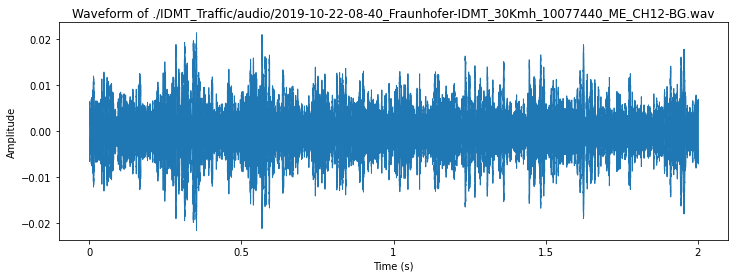

In [19]:
test_path = directory_path + paths[0]
visualize_wav(test_path)

In [23]:
def extract_attr(name):
    return name[-6:-4]
attr_of_instances = [extract_attr(path) for path in paths]

In [25]:
import numpy as np

In [47]:
non_noise = [path for path in paths if '-BG' not in path]

In [55]:
np.unique([path.split('_')[1] for path in non_noise])

array(['Fraunhofer-IDMT', 'Hohenwarte', 'Langewiesener-Strasse',
       'Schleusinger-Allee'], dtype='<U21')

In [53]:
def extract_attr(path):
    attr = path.split('_')
    return (attr[1],attr[6][0])
attr_of_instances = [extract_attr(path) for path in non_noise]

In [61]:
attr_matrix = [[0 for _ in range(4)] for _ in range(4)]

locations = ['Fraunhofer-IDMT', 'Hohenwarte', 'Langewiesener-Strasse','Schleusinger-Allee']
labels = ['C','M','T','B']

for mic_name,v_label in attr_of_instances:
    row = locations.index(mic_name)
    col = labels.index(v_label)
    attr_matrix[row][col] += 1

df = pd.DataFrame(attr_matrix)

df.index = locations
df.columns = labels

# sum all columns
df['Sum'] = df.cumsum(axis=1).iloc[:, -1]

# sum all rows
df.loc['Sum'] = df.cumsum(axis=0).iloc[-1, :]

df/2

,C,M,T,B,Sum
Fraunhofer-IDMT,556.0,5.0,24.0,7.0,592.0
Hohenwarte,0.0,210.0,0.0,0.0,210.0
Langewiesener-Strasse,2189.0,0.0,298.0,40.0,2527.0
Schleusinger-Allee,1157.0,0.0,189.0,6.0,1352.0
Sum,3902.0,215.0,511.0,53.0,4681.0


In [45]:
# Create a dictionary of element occurrences
element_counts = dict(zip(*np.unique(veh_class, return_counts=True)))

element_counts


{'B': 106, 'C': 7804, 'M': 430, 'T': 1022}